# Crosstalk effect on Multiple circuit execution with nisq-grover circuits

rum

2021 / 04 / 27


In [1]:
from toffoli_circuit import toffoli_circuit
from grover_experiments import multi_exec, results
from qiskit.tools import job_monitor
from qiskit.visualization import plot_histogram

In [2]:
# prepare grover circuits

ts1 = toffoli_circuit(mode='swap', measure=True, repeat=2)
qb1 = [ts1.qregs[0][0], ts1.qregs[0][1], ts1.qregs[0][2]]

ts2 = toffoli_circuit(mode='swap', measure=False, repeat=2)
qb2 = [ts2.qregs[0][0], ts2.qregs[0][1], ts2.qregs[0][2]]

ts3 = toffoli_circuit(mode='swap', measure=False, repeat=2)
qb3 = [ts3.qregs[0][0], ts3.qregs[0][1], ts3.qregs[0][2]]

# ts4 = toffoli_circuit(mode='swap', measure=False, repeat=2)
# qb4 = [ts4.qregs[0][0], ts4.qregs[0][1], ts4.qregs[0][2]]

# ts5 = toffoli_circuit(mode='swap', measure=False, repeat=2)
# qb5 = [ts5.qregs[0][0], ts5.qregs[0][1], ts5.qregs[0][2]]

## Run on IBM Q  Toronto

In [3]:
backend_name = 'ibmq_toronto'
shots = 1000
num_trial = 100
il1 = {qb1[0]: 12, qb1[1]: 13, qb1[2]: 14}
il2 = {qb2[0]: 1,  qb2[1]: 2,  qb2[2]: 3 }
il3 = {qb3[0]: 23, qb3[1]: 24, qb3[2]: 25}
# il4 = {qb4[0]: 18, qb4[1]: 21, qb4[2]: 23}
# il5 = {qb5[0]: 19, qb5[1]: 22, qb5[2]: 25}

In [4]:
# run on device
job_sim1, job1, qc1= multi_exec(backend_name=backend_name, experiments=[(ts1, il1)], num_trial=num_trial, shots=shots, return_qc=True)
job_id1 = job1.job_id()
print('job_id1 = ', job_id1)

job_id1 =  608755ed9ee15b83c0b900f8


In [5]:
# run on device
job_sim2, job2, qc2= multi_exec(backend_name=backend_name, experiments=[(ts1, il1), (ts2, il2)], num_trial=num_trial, shots=shots, return_qc=True)
job_id2 = job2.job_id()
print('job_id2 = ', job_id2)

ibmqfactory.load_account:WARNING:2021-04-27 09:08:17,188: Credentials are already in use. The existing account in the session will be replaced.


job_id2 =  608756057c44597396c19fd9


In [6]:
# run on device
job_sim3, job3, qc3= multi_exec(backend_name=backend_name, experiments=[(ts1, il1), (ts2, il2), (ts3, il3)], num_trial=num_trial, shots=shots, return_qc=True)
job_id3 = job3.job_id()
print('job_id3 = ', job_id3)

ibmqfactory.load_account:WARNING:2021-04-27 09:08:41,126: Credentials are already in use. The existing account in the session will be replaced.


job_id3 =  60875619429ad3fc10e2773c


In [7]:
# # run on device
# job_sim4, job4, qc4= multi_exec(backend_name=backend_name, experiments=[(ts1, il1), (ts2, il2), (ts3, il3), (ts4, il4)], num_trial=num_trial, shots=shots, return_qc=True)
# job_id4 = job4.job_id()
# print('job_id4 = ', job_id4)

NameError: name 'ts4' is not defined

In [ ]:
# # run on device
# job_sim5, job5, qc5= multi_exec(backend_name=backend_name, experiments=[(ts1, il1), (ts2, il2), (ts3, il3), (ts4, il4), (ts5, il5)], num_trial=num_trial, shots=shots, return_qc=True)
# job_id5 = job5.job_id()
# print('job_id5 = ', job_id5)

In [8]:
# Show the job status
job_monitor(job1)

Job Status: job has successfully run


In [9]:
print(qc1)

      ┌───┐                            ┌───┐           ┌───┐┌─────┐┌───┐     »
q0_0: ┤ X ├──■─────────────────────■───┤ T ├───────────┤ X ├┤ TDG ├┤ X ├─────»
      ├───┤┌─┴─┐┌─────┐┌───┐┌───┐┌─┴─┐┌┴───┴┐     ┌───┐└─┬─┘└┬───┬┘└─┬─┘┌───┐»
q0_1: ┤ H ├┤ X ├┤ TDG ├┤ X ├┤ T ├┤ X ├┤ TDG ├──■──┤ X ├──■───┤ T ├───■──┤ H ├»
      ├───┤└───┘└─────┘└─┬─┘└───┘└───┘└─────┘┌─┴─┐└─┬─┘┌───┐ ├───┤      └───┘»
q0_2: ┤ X ├──────────────■───────────────────┤ X ├──■──┤ T ├─┤ H ├───────────»
      └───┘                                  └───┘     └───┘ └───┘           »
c1: 3/═══════════════════════════════════════════════════════════════════════»
                                                                             »
«                                  ┌───┐           ┌───┐┌─────┐┌───┐┌─┐   
«q0_0: ──■─────────────────────■───┤ T ├───────────┤ X ├┤ TDG ├┤ X ├┤M├───
«      ┌─┴─┐┌─────┐┌───┐┌───┐┌─┴─┐┌┴───┴┐     ┌───┐└─┬─┘└┬───┬┘└─┬─┘└╥┘┌─┐
«q0_1: ┤ X ├┤ TDG ├┤ X ├┤ T ├┤ X ├┤ TDG ├──■──┤ X ├──■───┤ T ├──

In [10]:
# get the result
counts_sim1, counts1 = results(backend_name=backend_name, job_sim=job_sim1, job_id=job_id1, num_trial=num_trial)

ibmqfactory.load_account:WARNING:2021-04-27 09:12:34,391: Credentials are already in use. The existing account in the session will be replaced.


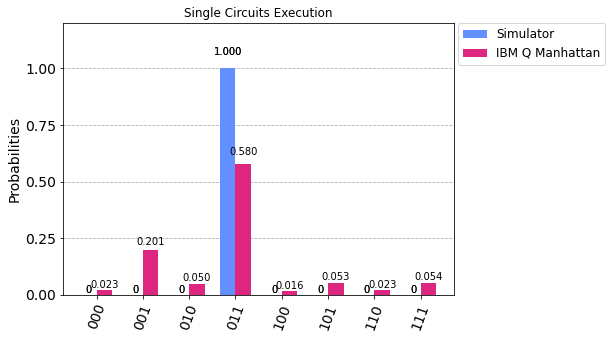

In [11]:
# # show plots
plot_histogram([counts_sim1, counts1], title='Single Circuits Execution', legend=['Simulator', 'IBM Q Manhattan'])

## 2 circuits execution

In [12]:
# # run on device
# job_sim2, job2, qc2= multi_exec(backend_name=backend_name, experiments=[(ts1, il1), (ts2, il2)], num_trial=num_trial, shots=shots, return_qc=True)
# job_id2 = job2.job_id()
# print(job_id2)

In [13]:
# Show the job status
job_monitor(job2)

Job Status: job has successfully run


In [14]:
print(qc2)

      ┌───┐                            ┌───┐           ┌───┐┌─────┐┌───┐     »
q0_0: ┤ X ├──■─────────────────────■───┤ T ├───────────┤ X ├┤ TDG ├┤ X ├─────»
      ├───┤┌─┴─┐┌─────┐┌───┐┌───┐┌─┴─┐┌┴───┴┐     ┌───┐└─┬─┘└┬───┬┘└─┬─┘┌───┐»
q0_1: ┤ H ├┤ X ├┤ TDG ├┤ X ├┤ T ├┤ X ├┤ TDG ├──■──┤ X ├──■───┤ T ├───■──┤ H ├»
      ├───┤└───┘└─────┘└─┬─┘└───┘└───┘└─────┘┌─┴─┐└─┬─┘┌───┐ ├───┤      └───┘»
q0_2: ┤ X ├──────────────■───────────────────┤ X ├──■──┤ T ├─┤ H ├───────────»
      ├───┤                            ┌───┐ └───┘     ├───┤┌┴───┴┐┌───┐     »
q1_0: ┤ X ├──■─────────────────────■───┤ T ├───────────┤ X ├┤ TDG ├┤ X ├─────»
      ├───┤┌─┴─┐┌─────┐┌───┐┌───┐┌─┴─┐┌┴───┴┐     ┌───┐└─┬─┘└┬───┬┘└─┬─┘┌───┐»
q1_1: ┤ H ├┤ X ├┤ TDG ├┤ X ├┤ T ├┤ X ├┤ TDG ├──■──┤ X ├──■───┤ T ├───■──┤ H ├»
      ├───┤└───┘└─────┘└─┬─┘└───┘└───┘└─────┘┌─┴─┐└─┬─┘┌───┐ ├───┤      └───┘»
q1_2: ┤ X ├──────────────■───────────────────┤ X ├──■──┤ T ├─┤ H ├───────────»
      └───┘                                  └───┘  

In [15]:
# get the result
counts_sim2, counts2 = results(backend_name=backend_name, job_sim=job_sim2, job_id=job_id2, num_trial=num_trial)

ibmqfactory.load_account:WARNING:2021-04-27 09:13:23,394: Credentials are already in use. The existing account in the session will be replaced.


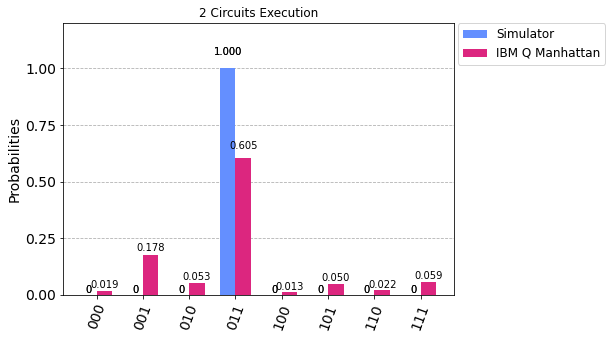

In [16]:
# # show plots
plot_histogram([counts_sim2, counts2], title='2 Circuits Execution', legend=['Simulator', 'IBM Q Manhattan'])

## 3 Circuits execution

In [17]:
# # run on device
# job_sim3, job3, qc3= multi_exec(backend_name=backend_name, experiments=[(ts1, il1), (ts2, il2), (ts3, il3)], num_trial=num_trial, shots=shots, return_qc=True)
# job_id3 = job3.job_id()
# print(job_id3)

In [18]:
# Show the job status
job_monitor(job3)

Job Status: job has successfully run


In [19]:
print(qc3)

      ┌───┐                            ┌───┐           ┌───┐┌─────┐┌───┐     »
q0_0: ┤ X ├──■─────────────────────■───┤ T ├───────────┤ X ├┤ TDG ├┤ X ├─────»
      ├───┤┌─┴─┐┌─────┐┌───┐┌───┐┌─┴─┐┌┴───┴┐     ┌───┐└─┬─┘└┬───┬┘└─┬─┘┌───┐»
q0_1: ┤ H ├┤ X ├┤ TDG ├┤ X ├┤ T ├┤ X ├┤ TDG ├──■──┤ X ├──■───┤ T ├───■──┤ H ├»
      ├───┤└───┘└─────┘└─┬─┘└───┘└───┘└─────┘┌─┴─┐└─┬─┘┌───┐ ├───┤      └───┘»
q0_2: ┤ X ├──────────────■───────────────────┤ X ├──■──┤ T ├─┤ H ├───────────»
      ├───┤                            ┌───┐ └───┘     ├───┤┌┴───┴┐┌───┐     »
q1_0: ┤ X ├──■─────────────────────■───┤ T ├───────────┤ X ├┤ TDG ├┤ X ├─────»
      ├───┤┌─┴─┐┌─────┐┌───┐┌───┐┌─┴─┐┌┴───┴┐     ┌───┐└─┬─┘└┬───┬┘└─┬─┘┌───┐»
q1_1: ┤ H ├┤ X ├┤ TDG ├┤ X ├┤ T ├┤ X ├┤ TDG ├──■──┤ X ├──■───┤ T ├───■──┤ H ├»
      ├───┤└───┘└─────┘└─┬─┘└───┘└───┘└─────┘┌─┴─┐└─┬─┘┌───┐ ├───┤      └───┘»
q1_2: ┤ X ├──────────────■───────────────────┤ X ├──■──┤ T ├─┤ H ├───────────»
      ├───┤                            ┌───┐ └───┘  

In [20]:
# get the result
counts_sim3, counts3 = results(backend_name=backend_name, job_sim=job_sim3, job_id=job_id3, num_trial=num_trial)

ibmqfactory.load_account:WARNING:2021-04-27 09:14:17,845: Credentials are already in use. The existing account in the session will be replaced.


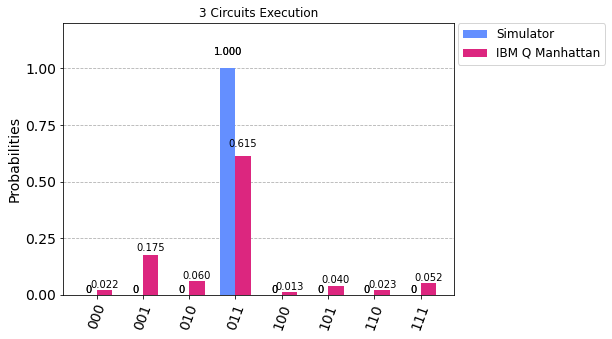

In [21]:
# # show plots
plot_histogram([counts_sim3, counts3], title='3 Circuits Execution', legend=['Simulator', 'IBM Q Manhattan'])

## 4 circuit execution

In [22]:
# # run on device
# job_sim4, job4, qc4= multi_exec(backend_name=backend_name, experiments=[(ts1, il1), (ts2, il2), (ts3, il3), (ts4, il4)], num_trial=num_trial, shots=shots, return_qc=True)
# job_id4 = job4.job_id()
# print(job_id4)

In [23]:
# # Show the job status
# job_monitor(job4)

In [24]:
# print(qc4)

In [25]:
# # get the result
# counts_sim4, counts4 = results(backend_name=backend_name, job_sim=job_sim4, job_id=job_id4, num_trial=num_trial)

In [26]:
# # # show plots
# plot_histogram([counts_sim4, counts4], title='4 Circuits Execution', legend=['Simulator', 'IBM Q Manhattan'])

## 5 circuit execution

In [27]:
# # run on device
# job_sim5, job5, qc5= multi_exec(backend_name=backend_name, experiments=[(ts1, il1), (ts2, il2), (ts3, il3), (ts4, il4), (ts5, il5)], num_trial=num_trial, shots=shots, return_qc=True)
# job_id5 = job5.job_id()
# print(job_id5)

In [28]:
# # Show the job status
# job_monitor(job5)

In [29]:
# print(qc5)

In [30]:
# # get the result
# counts_sim5, counts5 = results(backend_name=backend_name, job_sim=job_sim5, job_id=job_id5, num_trial=num_trial)

In [31]:
# # # show plots
# plot_histogram([counts_sim5, counts5], title='5 Circuits Execution', legend=['Simulator', 'IBM Q Manhattan'])

## Show result

In [32]:
from jsd import jsd
from pst import pst

In [33]:
jsd1 = jsd(counts_sim1, counts1)
jsd2 = jsd(counts_sim2, counts2)
jsd3 = jsd(counts_sim3, counts3)
# jsd4 = jsd(counts_sim4, counts4)
# jsd5 = jsd(counts_sim5, counts5)

pst1 = pst(counts1, counts_sim1)
pst2 = pst(counts2, counts_sim2)
pst3 = pst(counts3, counts_sim3)
# pst4 = pst(counts4, counts_sim4)
# pst5 = pst(counts5, counts_sim5)

In [34]:
print(jsd1)
print(jsd2)
print(jsd3)
# print(jsd4)
# print(jsd5)

0.4168121687929628
0.401548798598691
0.39597517703285556


In [35]:
print(pst1)
print(pst2)
print(pst3)
# print(pst4)
# print(pst5)

0.59408
0.61996
0.62934
